In [13]:
import json
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from streamlit_folium import st_folium

In [2]:
client=pymongo.MongoClient("mongodb://localhost:27017/")
Mydb = client['Airbnb_Analysis']
collection =Mydb["Airbnb"]
data = collection.find()
df = pd.DataFrame(data)

In [3]:
print(df.isnull().sum())

_id                         0
listing_url                 0
name                        0
summary                     0
space                       0
description                 0
neighborhood_overview       0
notes                       0
transit                     0
access                      0
interaction                 0
house_rules                 0
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
last_scraped                0
calendar_last_scraped       0
first_review             1388
last_review              1388
accommodates                0
bedrooms                    5
beds                       13
number_of_reviews           0
bathrooms                  10
amenities                   0
price                       0
security_deposit         2084
cleaning_fee             1531
extra_people                0
guests_included             0
images    

In [4]:
most_common_first_review = df['first_review'].mode()[0]
df['first_review'] = df['first_review'].fillna(most_common_first_review)

most_common_last_review = df['last_review'].mode()[0]
df['last_review'] = df['last_review'].fillna(most_common_last_review)

In [5]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

df['weekly_price'] = df['weekly_price'].fillna(df['weekly_price'].median())
df['monthly_price'] = df['monthly_price'].fillna(df['monthly_price'].median())

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [6]:
print(df.isnull().sum())

_id                         0
listing_url                 0
name                        0
summary                     0
space                       0
description                 0
neighborhood_overview       0
notes                       0
transit                     0
access                      0
interaction                 0
house_rules                 0
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
last_scraped                0
calendar_last_scraped       0
first_review                0
last_review                 0
accommodates                0
bedrooms                    0
beds                        0
number_of_reviews           0
bathrooms                  10
amenities                   0
price                       0
security_deposit         2084
cleaning_fee             1531
extra_people                0
guests_included             0
images    

In [7]:
df.to_csv('cleaned_dataset.csv', index=False)

In [8]:
cleaned_data=r"C:\Users\Shanmugam.V\Desktop\Airbnb\cleaned_dataset.csv" 
df_cleaned = pd.read_csv(cleaned_data)

In [33]:
df_cleaned

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,NaN,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '454250', 'host_url': 'https://www...","{'street': 'New York, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': '2013-04-29 04:00:...",800.0,2800.0,0.0
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,NaN,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,NaN,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '52004703', 'host_url': 'https://w...","{'street': 'Fatih , İstanbul, Turkey', 'suburb...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '149469150', 'date': '2017-05-04 04:0...",800.0,2800.0,0.0
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",NaN,"Clean, fully furnish, Spacious 1 bedroom flat ...",NaN,NaN,NaN,NaN,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51624384', 'host_url': 'https://w...","{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '56904633', 'date': '2015-12-19 05:00...",5000.0,2800.0,0.0
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51744313', 'host_url': 'https://w...","{'street': 'Hong Kong , 九龍, Hong Kong', 'subur...","{'availability_30': 14, 'availability_60': 24,...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '57191745', 'date': '2015-12-22 05:00...",1350.0,5000.0,0.0
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '13764143', 'host_url': 'https://w...","{'street': 'Surry Hills, NSW, Australia', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '123549502', 'date': '2016-12-29 05:0...",800.0,2800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,NaN,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,NaN,NaN,NaN,NaN,...,1,"{'thumbnail_url': '', 'med

In [9]:
df.columns

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')

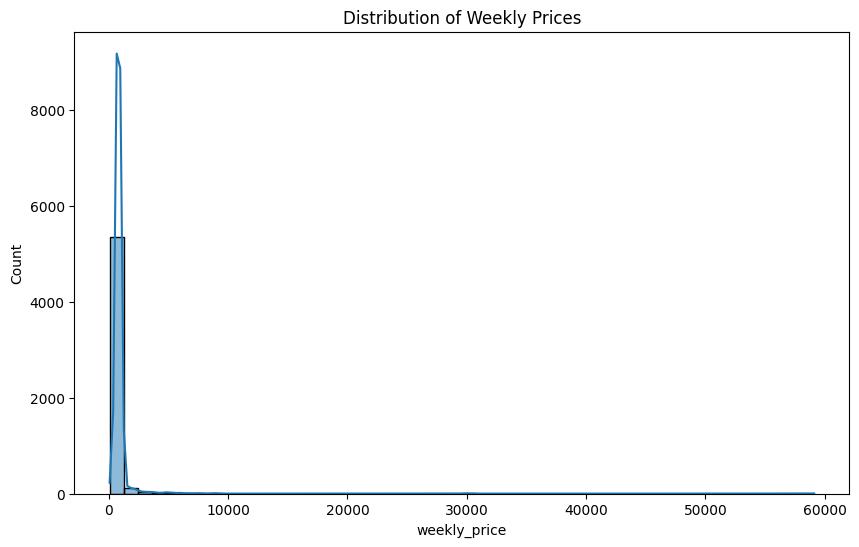

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['weekly_price'], bins=50, kde=True)
plt.title('Distribution of Weekly Prices')
plt.show()

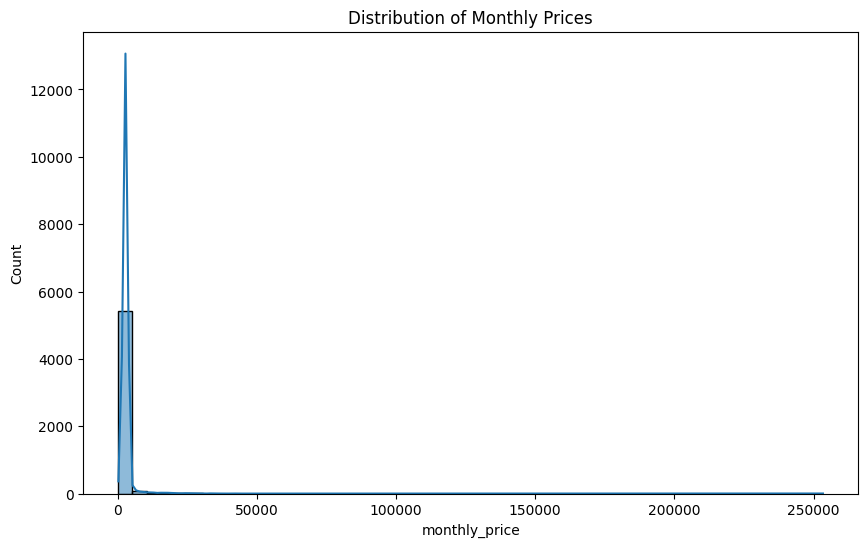

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['monthly_price'], bins=50, kde=True)
plt.title('Distribution of Monthly Prices')
plt.show()

In [14]:
# Create a map centered around a specific location
map_center = [df_cleaned['latitude'].mean(), df_cleaned['longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=12)

for _, row in df_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: ${row['price']}, Rating: {row['review_scores']['review_scores_rating']}"
    ).add_to(map_)

# Display map with Streamlit
st_folium(map_, width=725, height=500)

KeyError: 'latitude'